In [1]:
library(tidyverse)
theme_set(cowplot::theme_cowplot())

source("core_functions.R")

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "../data/angsd_pi/v5--LR--Amatlan_de_Canas.1000000BP_theta.txt"     
 [2] "../data/angsd_pi/v5--LR--Crucero_Lagunitas.1000000BP_theta.txt"    
 [3] "../data/angsd_pi/v5--LR--Los_Guajes.1000000BP_theta.txt"           
 [4] "../data/angsd_pi/v5--LR--Palmar_Chico.1000000BP_theta.txt"         
 [5] "../data/angsd_pi/v5--LR--random.1000000BP_theta.txt"               
 [6] "../data/angsd_pi/v5--LR--random1_Palmar_Chico.1000000BP_theta.txt" 
 [7] "../data/angsd_pi/v5--LR--random2_Palmar_Chico.1000000BP_theta.txt" 
 [8] "../data/angsd_pi/v5--LR--San_Lorenzo.1000000BP_theta.txt"          
 [9] "../data/angsd_pi/v5--Teo--Amatlan_de_Canas.1000000BP_theta.txt"    
[10] "../data/angsd_pi/v5--Teo--Crucero_Lagunitas.1000000BP_theta.txt"   
[11] "../data/angsd_pi/v5--Teo--El_Rodeo.1000000BP_theta.txt"            
[12] "../data/angsd_pi/v5--Teo--Los_Guajes.1000000BP_theta.txt"          
[13] "../data/angsd_pi/v5--Teo--Palmar_Chico.1000000BP_theta.txt"        
[14] "../data/angsd_pi/v5--Teo--random.1000000BP_theta.txt"              
[15] "../data/angsd_pi/v5--Teo--random1_Palmar_Chico.1000000BP_theta.txt"
[16] "../data/angsd_pi/v5--Teo--random2_Palmar_Chico.1000000BP_theta.txt"
[17] "../data/angsd_pi/v5--Teo--San_Lorenzo.1000000BP_theta.txt"

1000000BP_theta.txt

Rows: 21,302
Columns: 14
Delimiter: "\t"
chr [ 2]: info, chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 21,302
Columns: 14
Delimiter: "\t"
chr [ 2]: info, chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 21,302
Columns: 14
Delimiter: "\t"
chr [ 2]: info, chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 21,302
Columns: 14
Delimiter: "\t"
chr [ 2]: info, chr
dbl [12]: WinCenter, tW, tP, tF, tH, tL, Tajima, fuf, fud, fayh, zeng, nSites

Use `spec()` to retrieve the guessed column specif

Rows: 25
Columns: 3
Delimiter: "\t"
chr [1]: ssp_pop
dbl [2]: T, Ne

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 25
Columns: 3
Delimiter: "\t"
chr [1]: ssp_pop
dbl [2]: T, Ne

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 25
Columns: 3
Delimiter: "\t"
chr [1]: ssp_pop
dbl [2]: T, Ne

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 25
Columns: 3
Delimiter: "\t"
chr [1]: ssp_pop
dbl [2]: T, Ne

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 25
Columns: 3
Delimiter: "\t"
chr [1]: ssp_pop
dbl [2]: T, Ne

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows:

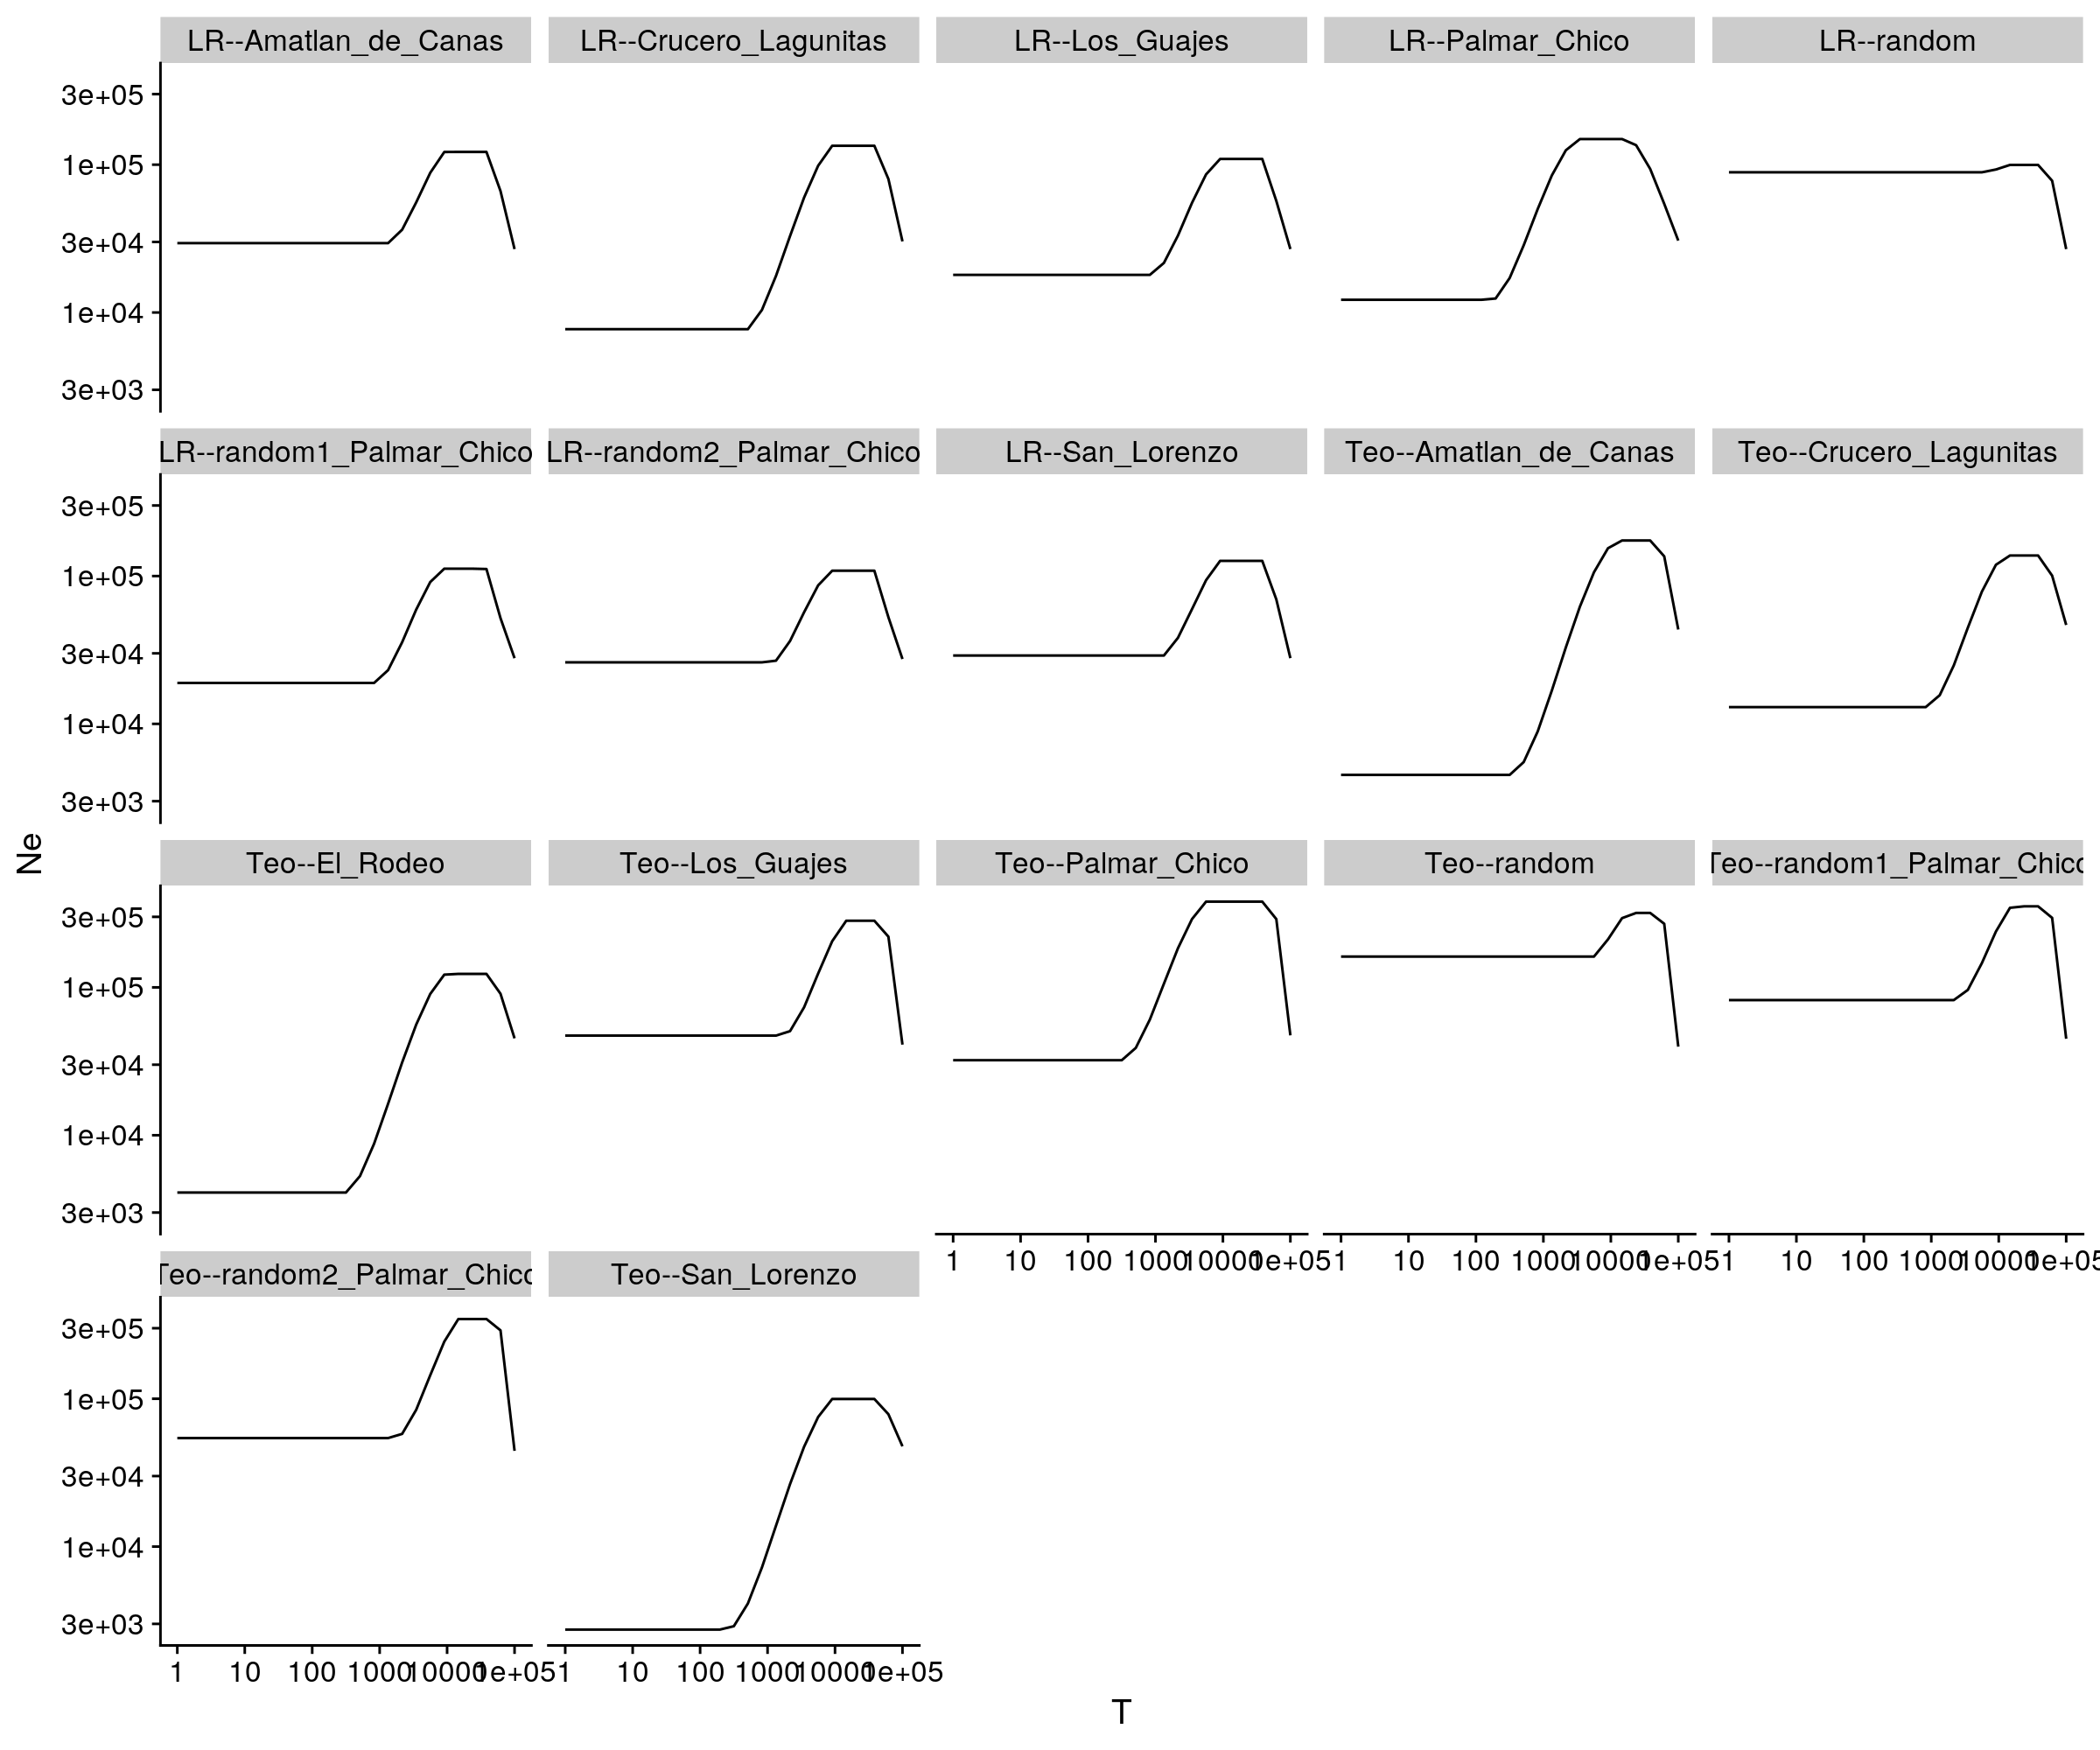

In [72]:
pi_df <- get_pi("100000")

demo_df <- fs::dir_ls(path = "../data/mushi/", glob = "*mushi_demography.txt") %>% 
    map_df(~ {
        vroom::vroom(.x, delim = "\t", col_names = c("T", "Ne", "ssp_pop"))
    })

ggplot(demo_df, aes(T, Ne)) +
    geom_line()+
    facet_wrap(~ssp_pop) +
    scale_x_continuous(trans = 'log10', breaks = 10^(0:5), labels = 10^(0:5)) +
    scale_y_continuous(trans = 'log10') 

In [3]:
gen_map_all_chr <- read_delim("../data/map/ogut_v5.map.txt", delim = "\t") %>% 
  drop_na() %>%
  mutate(cm = cm + abs(min(cm))) %>%
  group_by(chr) %>% 
  group_modify(~{
    df1 <- slice(.x, -nrow(.x))
    df2 <- slice(.x, -1)
    to_keep <- df2$cm > df1$cm & df2$pos > df1$pos
    df1 <- df1[to_keep, ]
    df2 <- df2[to_keep, ]
    cm_mb <- tibble(cm_mb = 1e6*(df2$cm - df1$cm)/(df2$pos - df1$pos))
    cm_bp <- tibble(rr = (df2$cm - df1$cm)/(df2$pos - df1$pos)/100)
    bind_cols(df2, cm_mb, cm_bp)
  }) %>% 
  mutate(chr = paste0("chr", chr))

median(gen_map_all_chr$rr)

get_rr <- function(genetic_df, sweep_chr, sweep_positions){
  chr_df <- filter(genetic_df, chr == sweep_chr)
  median(approx(x = chr_df$pos, y = chr_df$rr, xout = sweep_positions)$y)
}

get_cm <- function(genetic_df, sweep_chr, sweep_start, sweep_end){
  chr_df <- filter(genetic_df, chr == sweep_chr)
  cm_start <- approx(x = chr_df$pos, y = chr_df$cm, xout = sweep_start)$y
  cm_end <- approx(x = chr_df$pos, y = chr_df$cm, xout = sweep_end)$y
  cm_end - cm_start
}


gmap <- "../data/map/ogut_v5.map.txt"
gen_map_all_chr <- vroom::vroom(gmap, delim = "\t") %>%
  drop_na() %>%
  mutate(cm = cm + abs(min(cm))) %>%
  group_by(chr) %>%
  group_modify(~{
    df1 <- slice(.x, -nrow(.x))
    df2 <- slice(.x, -1)
    to_keep <- df2$cm > df1$cm & df2$pos > df1$pos
    df1 <- df1[to_keep, ]
    df2 <- df2[to_keep, ]
    cm_mb <- tibble(cm_mb = 1e6*(df2$cm - df1$cm)/(df2$pos - df1$pos))
    cm_bp <- tibble(rr = (df2$cm - df1$cm)/(df2$pos - df1$pos)/100)
    bind_cols(df2, cm_mb, cm_bp)
  }) %>%
  ungroup() %>% 
  mutate(chr = paste0("chr", chr))

median(gen_map_all_chr$rr)
mean(gen_map_all_chr$cm_mb)



get_tau <- function(p_recover, Morgans){
    -log(p_recover) / Morgans
}

get_s <- function(p_recover, Ne, Morgans){
    4*Morgans*log(2*Ne-p_recover)
}




── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  chr = col_double(),
  pos = col_double(),
  cm = col_double()
)




[1] 1.641221e-08

Rows: 6,490
Columns: 3
Delimiter: "\t"
dbl [3]: chr, pos, cm

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message



[1] 1.641221e-08

[1] 2.428135

In [4]:
p_rec <- 0.99

all_sweeps_df <- fs::dir_ls(glob = "*merged.txt", path = "../data/raisd/") %>% 
    map_df(~{
        vroom::vroom(.x, delim = "\t", col_names = c("chrom", "start", "end", "mu")) %>% 
        mutate(ssp_pop = str_remove_all(.x, "(v5--|../data/raisd/|.corrected_block_outliers_merged.txt)"))
    }) %>% 
    mutate(pop2 = ssp_pop) %>% 
    separate(pop2, c("ssp", "pop"), "--") %>% 
    rowwise() %>% 
    mutate(Morgans = get_cm(gen_map_all_chr, chrom, start, end)/100,
           tau = get_tau(p_recover = p_rec, Morgans = Morgans)) %>% 
    ungroup() %>% 
    drop_na()

head(all_sweeps_df)


Rows: 1,125
Columns: 4
Delimiter: "\t"
chr [1]: chrom
dbl [3]: start, end, mu

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 722
Columns: 4
Delimiter: "\t"
chr [1]: chrom
dbl [3]: start, end, mu

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,029
Columns: 4
Delimiter: "\t"
chr [1]: chrom
dbl [3]: start, end, mu

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 3
Columns: 4
Delimiter: "\t"
chr [1]: chrom
dbl [3]: start, end, mu

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 1,398
Columns: 4
Delimiter: "\t"
chr [1]: chrom
dbl [3]: start, end, mu

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_

chrom start    end      mu      ssp_pop              ssp pop             
1 chr7   6934683  6936984 4.05168 LR--Amatlan_de_Canas LR  Amatlan_de_Canas
2 chr7   8313898  8313899 3.85253 LR--Amatlan_de_Canas LR  Amatlan_de_Canas
3 chr7  13714271 13717328 4.31335 LR--Amatlan_de_Canas LR  Amatlan_de_Canas
4 chr7  19240403 19316653 4.67979 LR--Amatlan_de_Canas LR  Amatlan_de_Canas
5 chr7  36389658 36402822 4.37077 LR--Amatlan_de_Canas LR  Amatlan_de_Canas
6 chr7  36523778 36583053 4.80617 LR--Amatlan_de_Canas LR  Amatlan_de_Canas
  Morgans      tau         
1 4.036417e-05    248.99150
2 1.771903e-08 567205.77872
3 3.893077e-05    258.15917
4 2.156599e-04     46.60272
5 6.494528e-06   1547.50817
6 2.924363e-05    343.67605

Picking joint bandwidth of 0.456



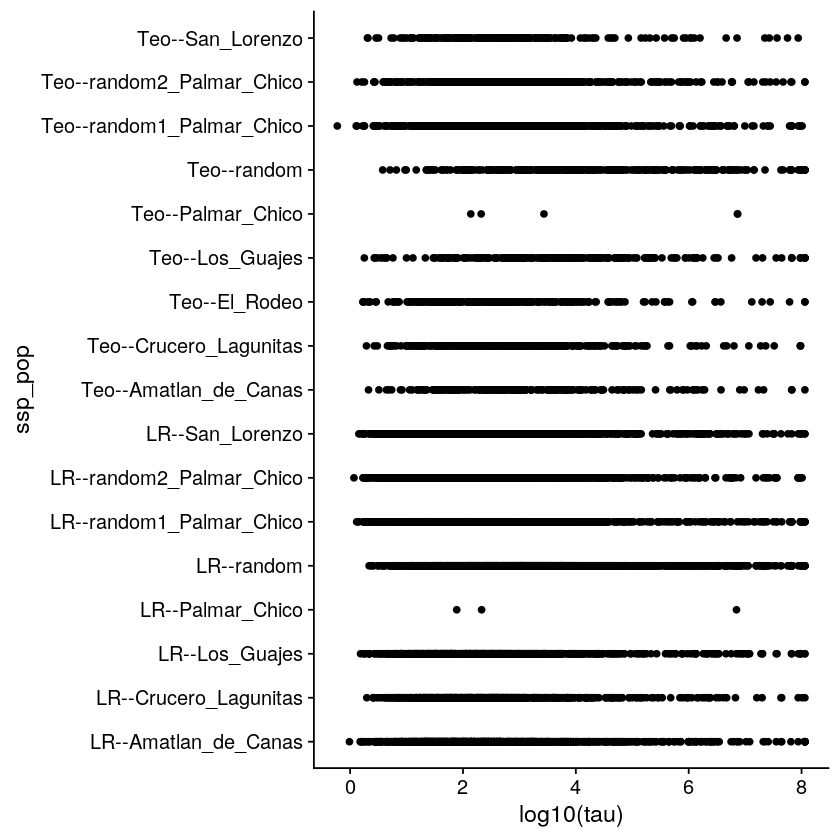

chrom start   end     mu      ssp_pop              ssp pop             
1 chr7  6934683 6936984 4.05168 LR--Amatlan_de_Canas LR  Amatlan_de_Canas
  Morgans      tau     
1 4.036417e-05 248.9915

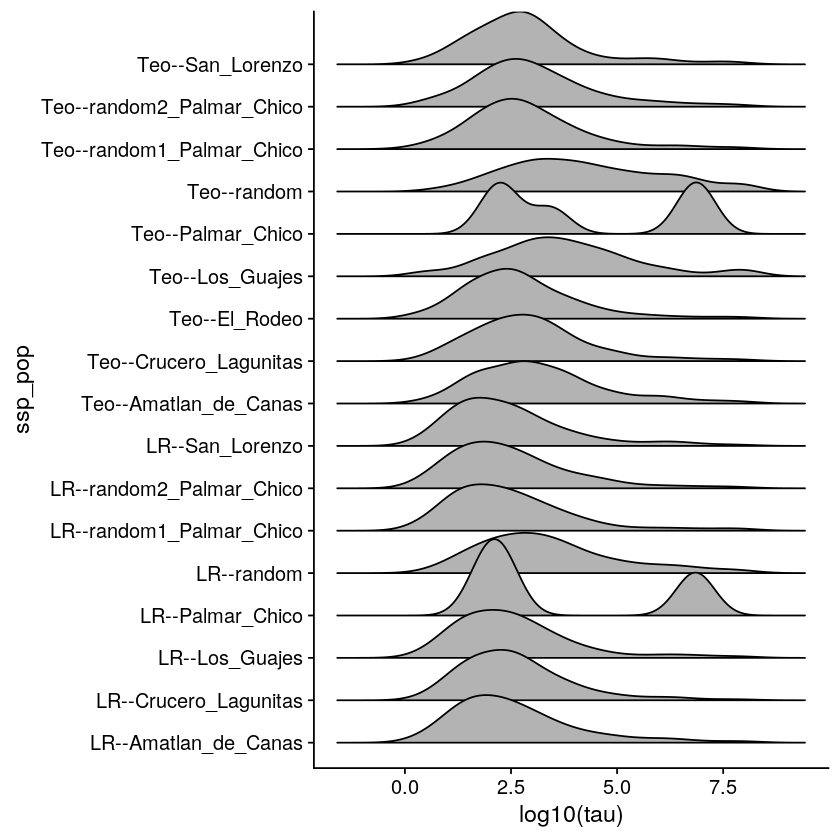

In [5]:
all_sweeps_df %>% 
    ggplot(aes(log10(tau), ssp_pop)) +
    geom_point() 


all_sweeps_df %>% 
    ggplot(aes(log10(tau), ssp_pop)) +
    ggridges::geom_density_ridges2()


all_sweeps_df[1,]

In [6]:
s  <- 1:nrow(all_sweeps_df) %>% 
    map_dbl(~{
    sweep_i <- all_sweeps_df[.x,]   
    tau_i <- filter(demo_df, ssp_pop == sweep_i$ssp_pop) %>% 
    mutate(ssq_time = (sweep_i$tau - T)^2) %>% 
    filter(ssq_time == min(ssq_time))
    
    get_s(p_recover = p_rec, Ne = tau_i$Ne, Morgans = sweep_i$Morgans)
})


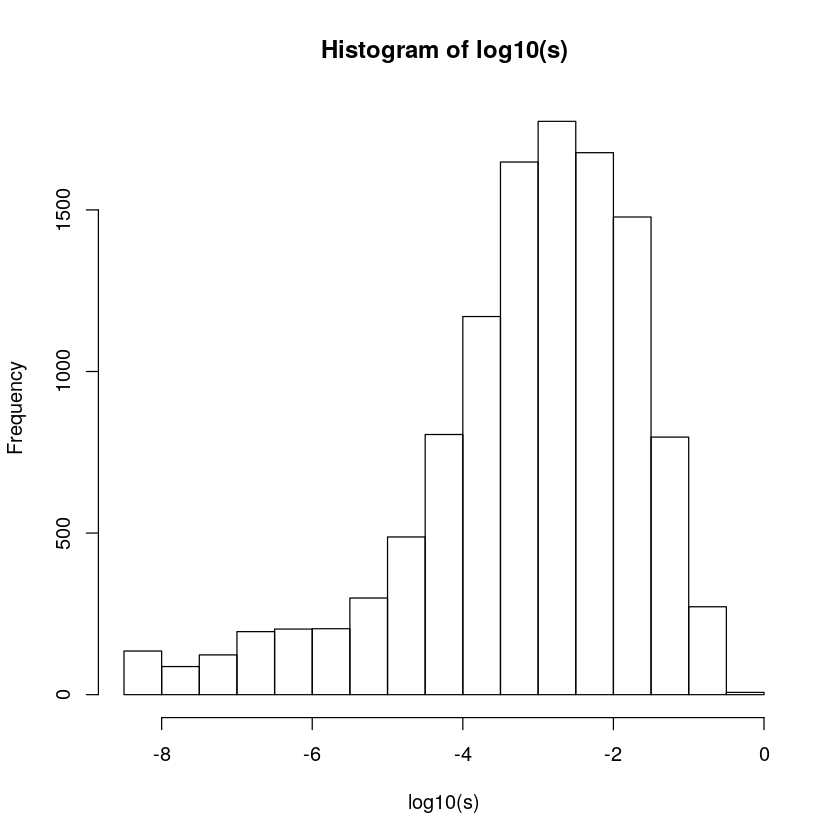

In [7]:
hist(log10(s))

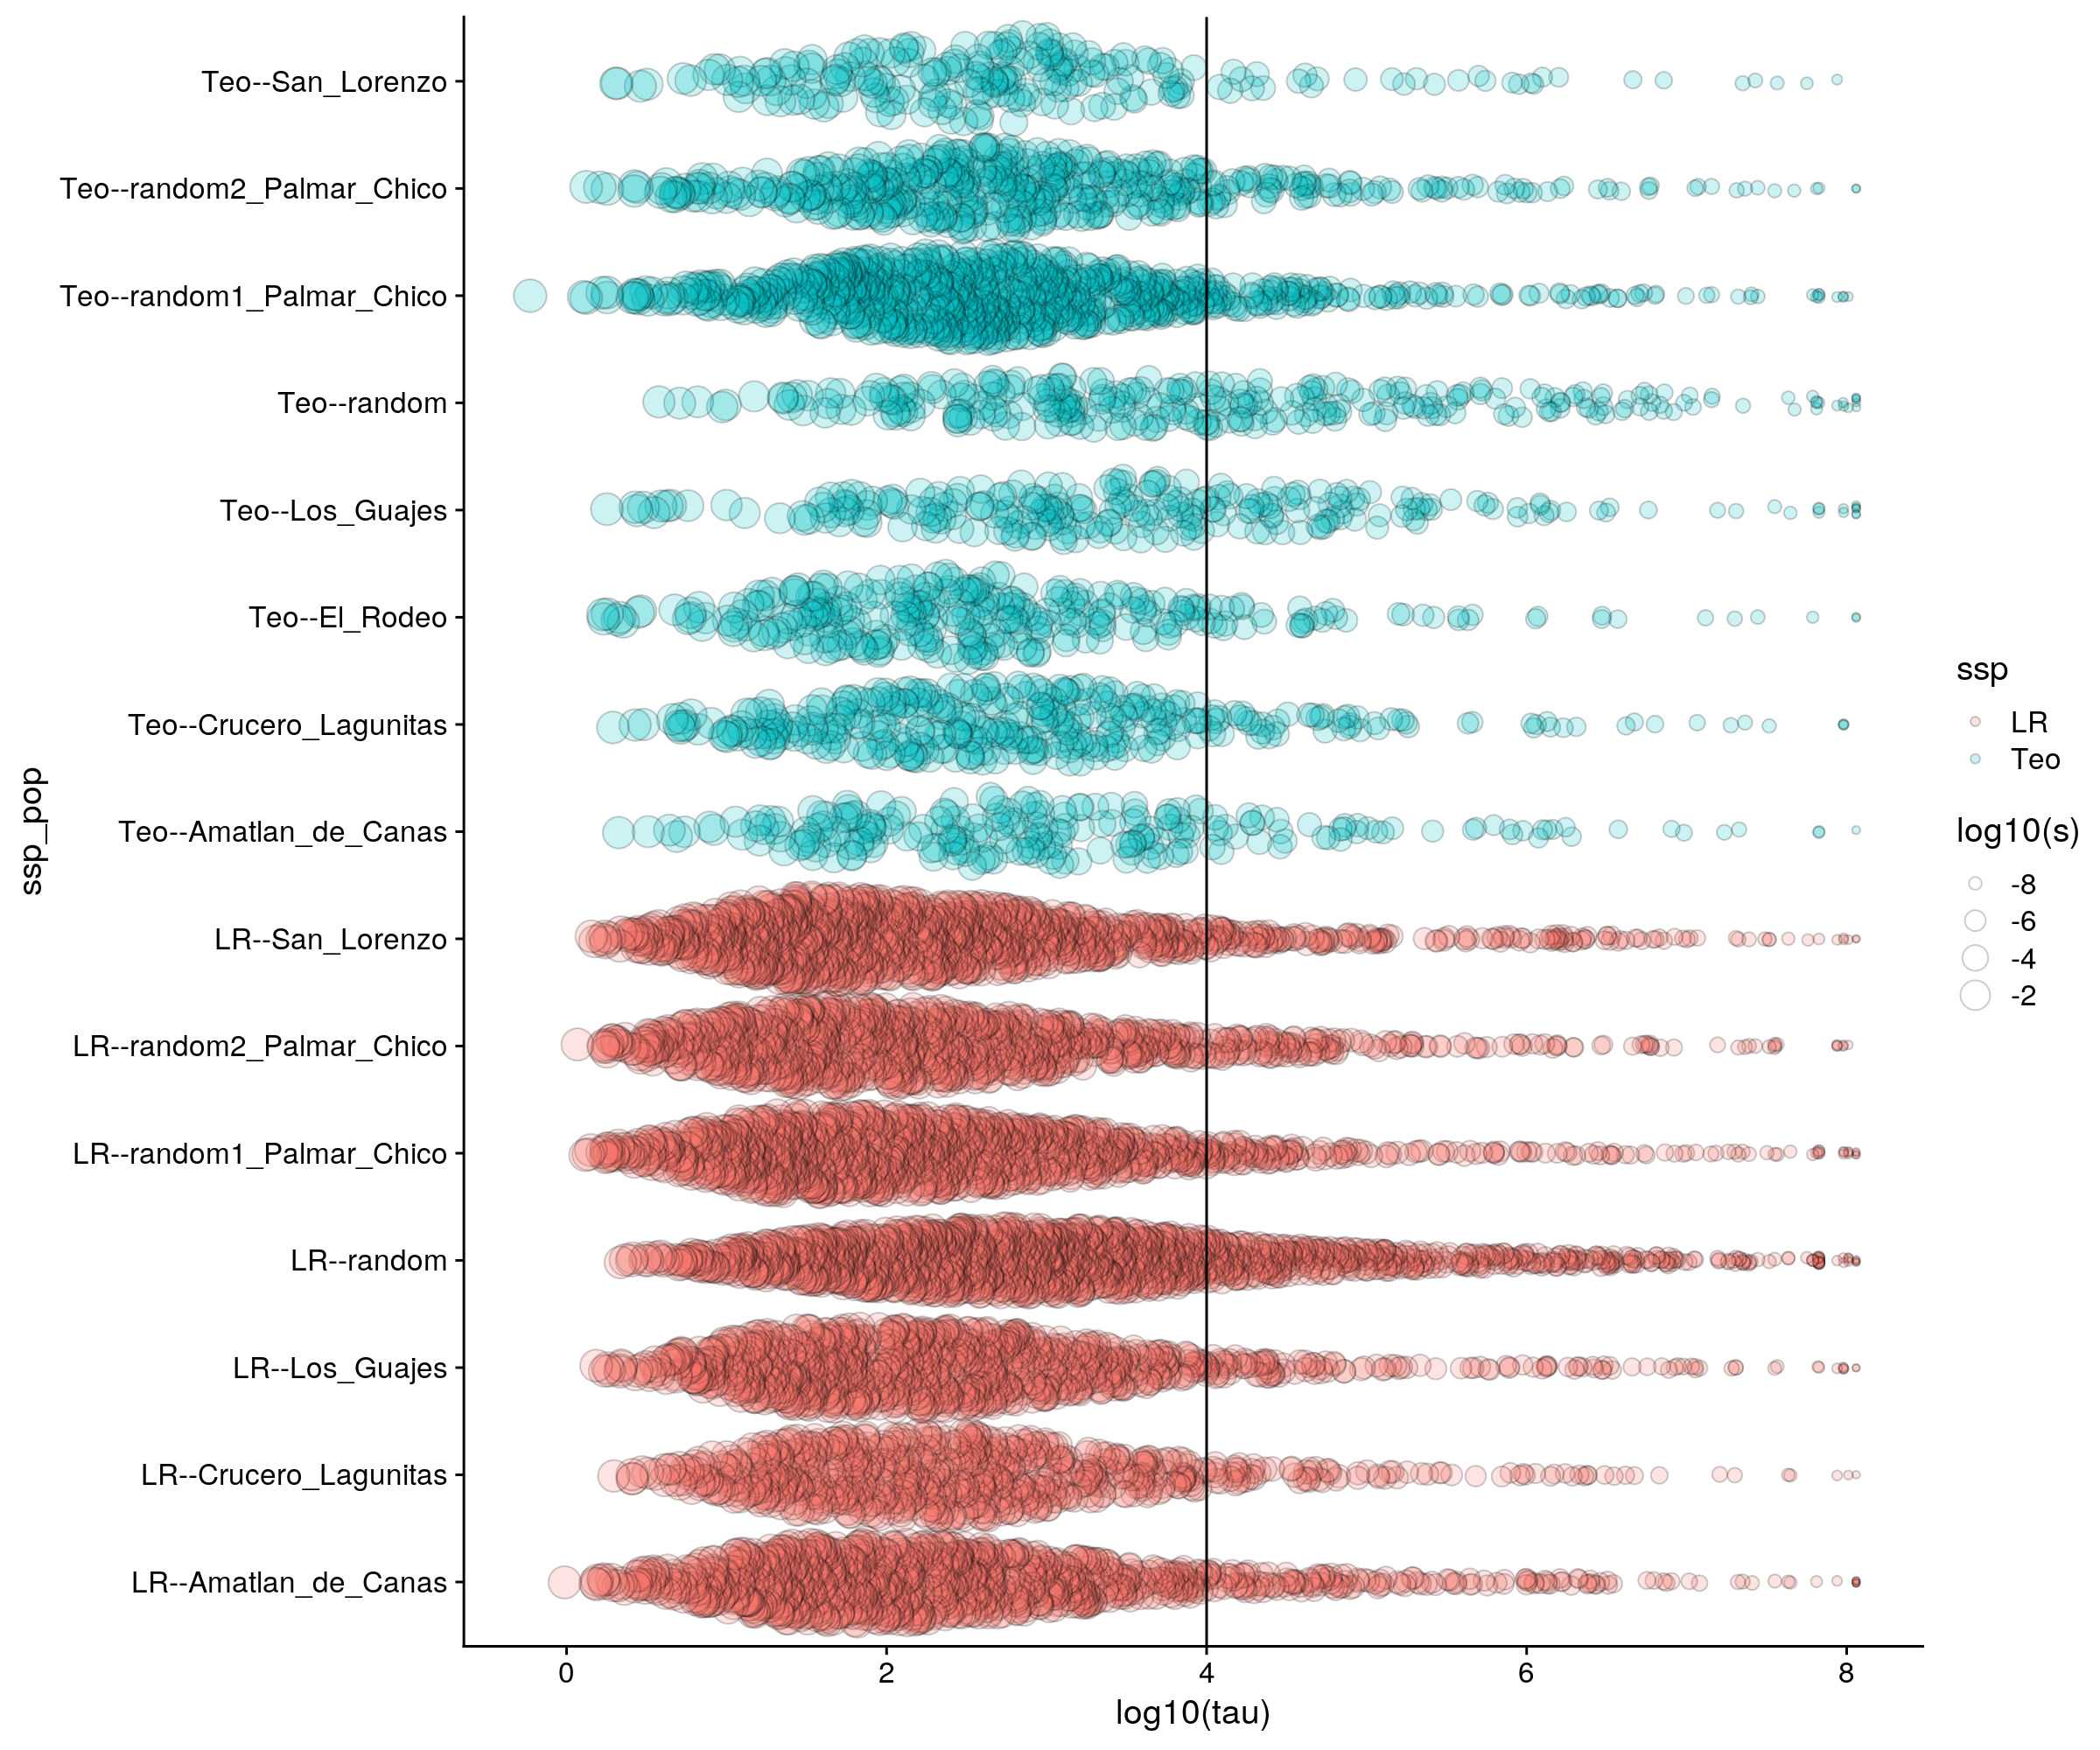

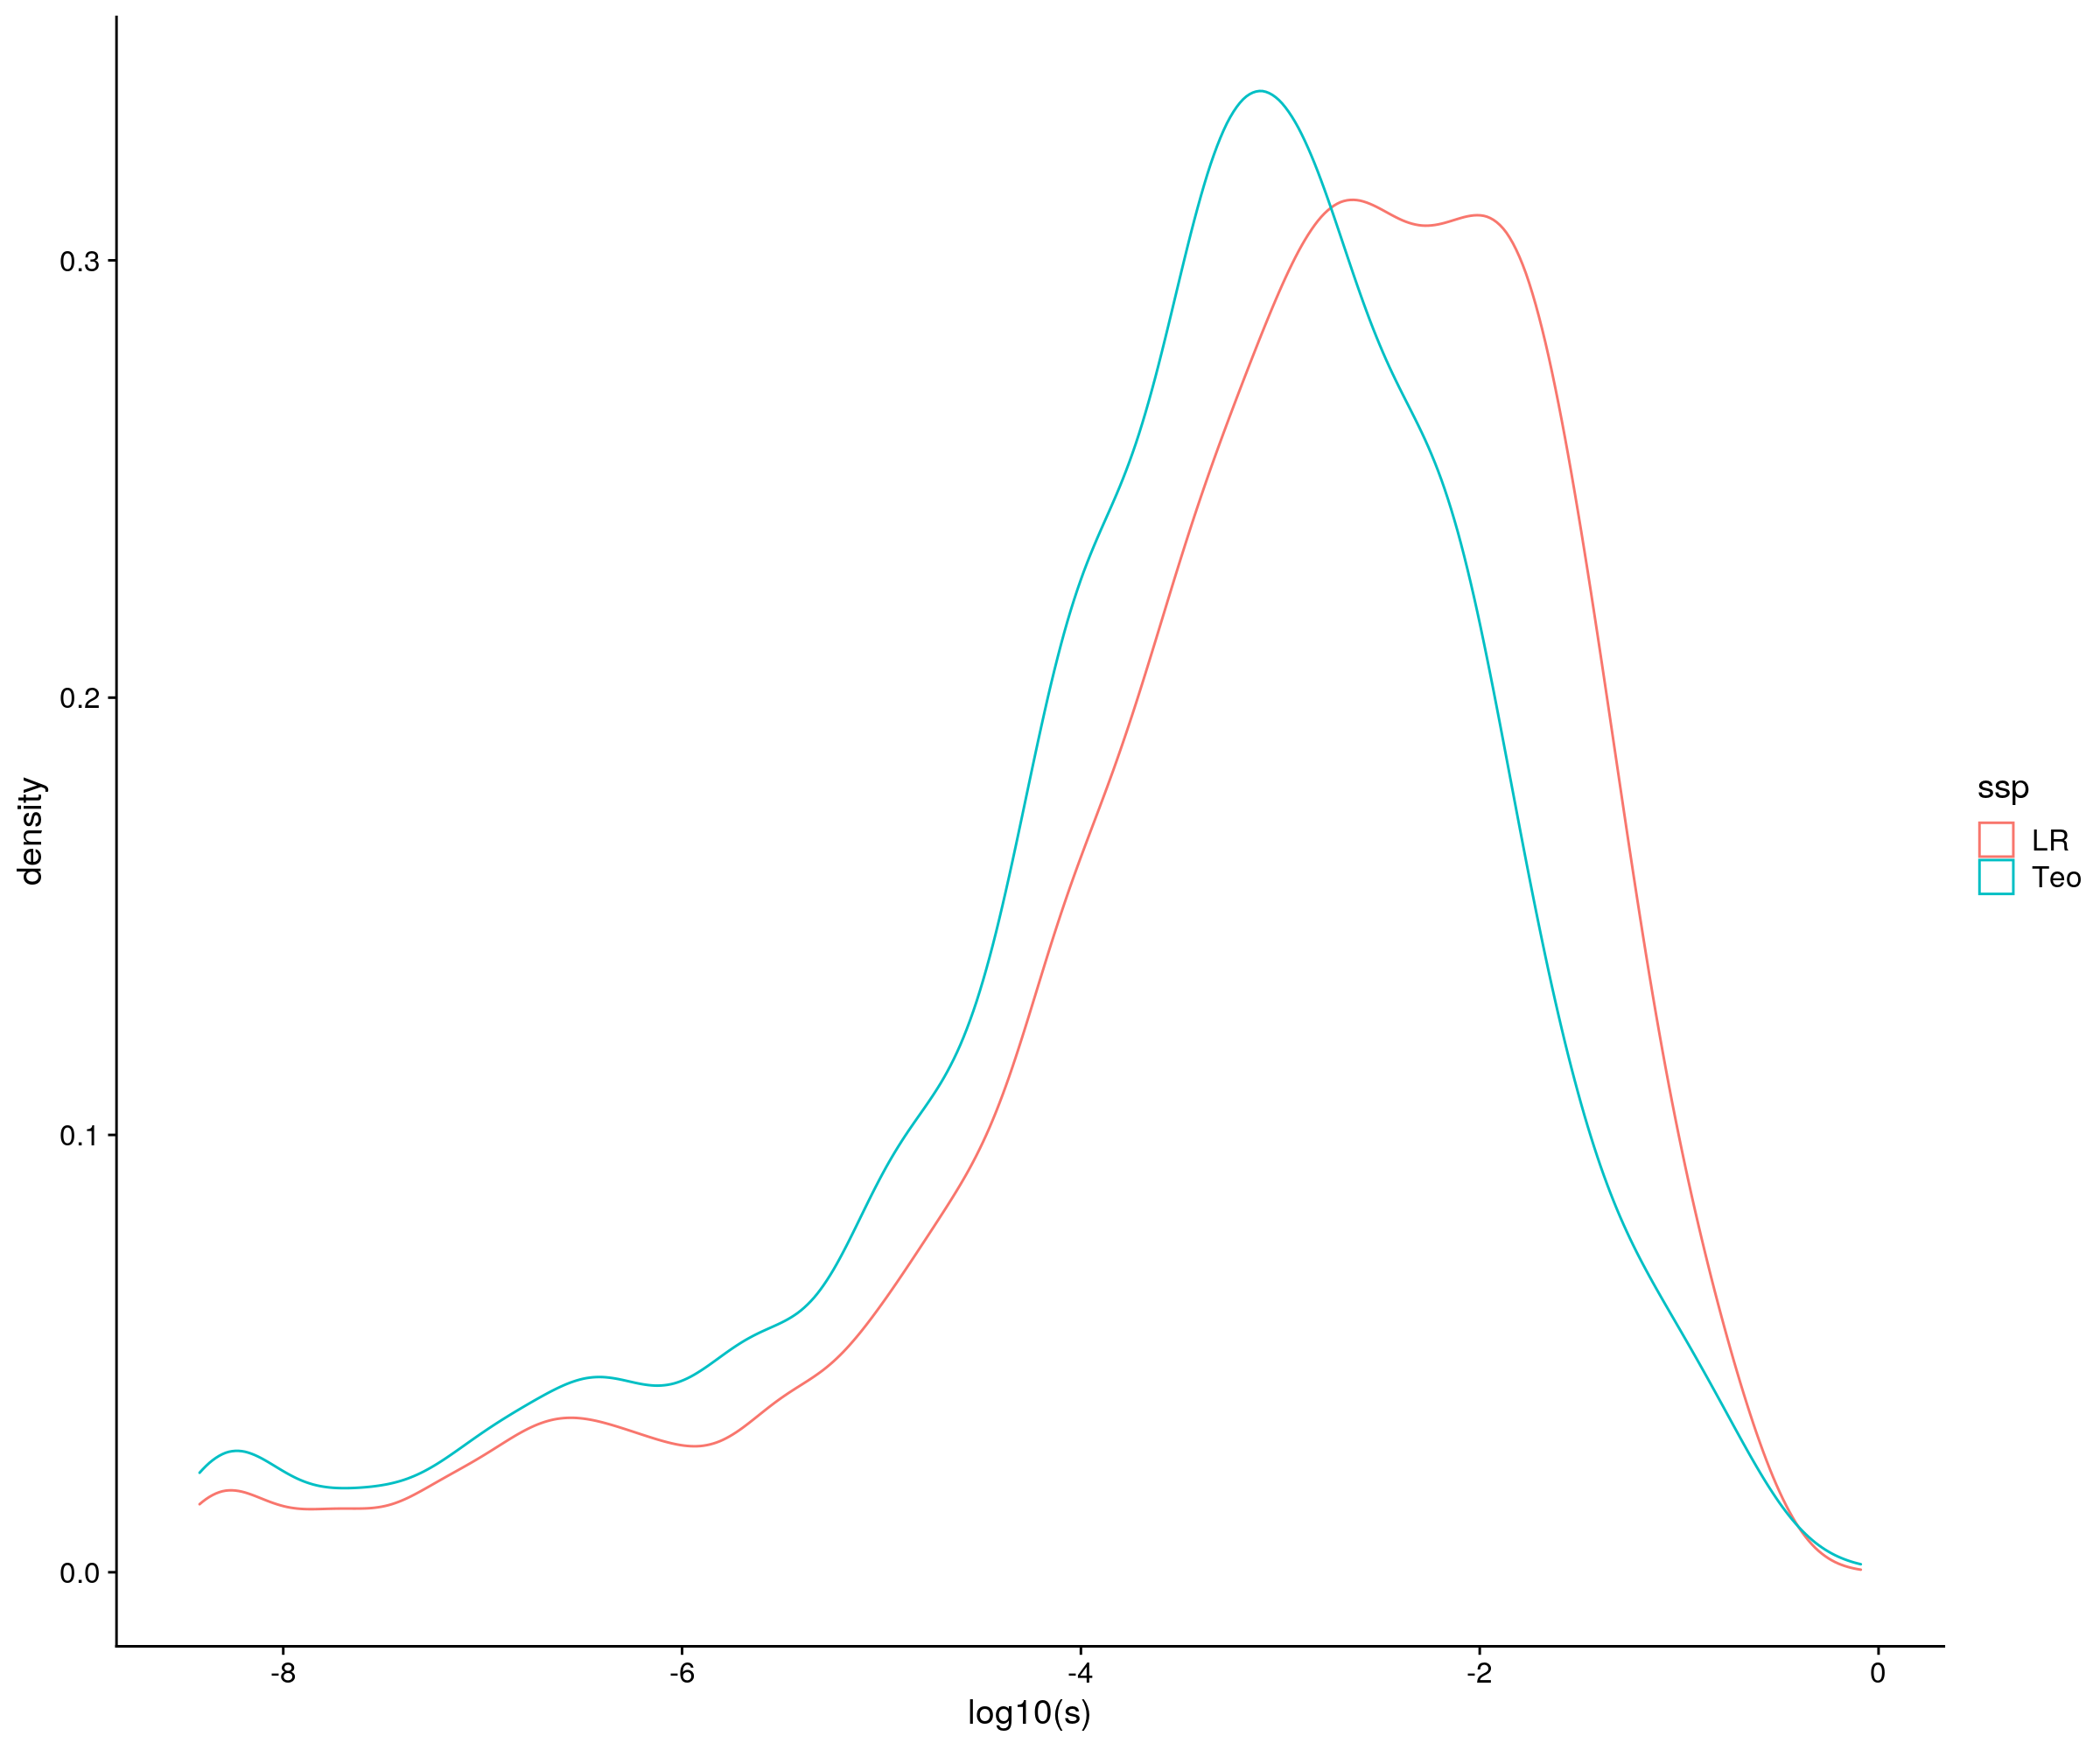

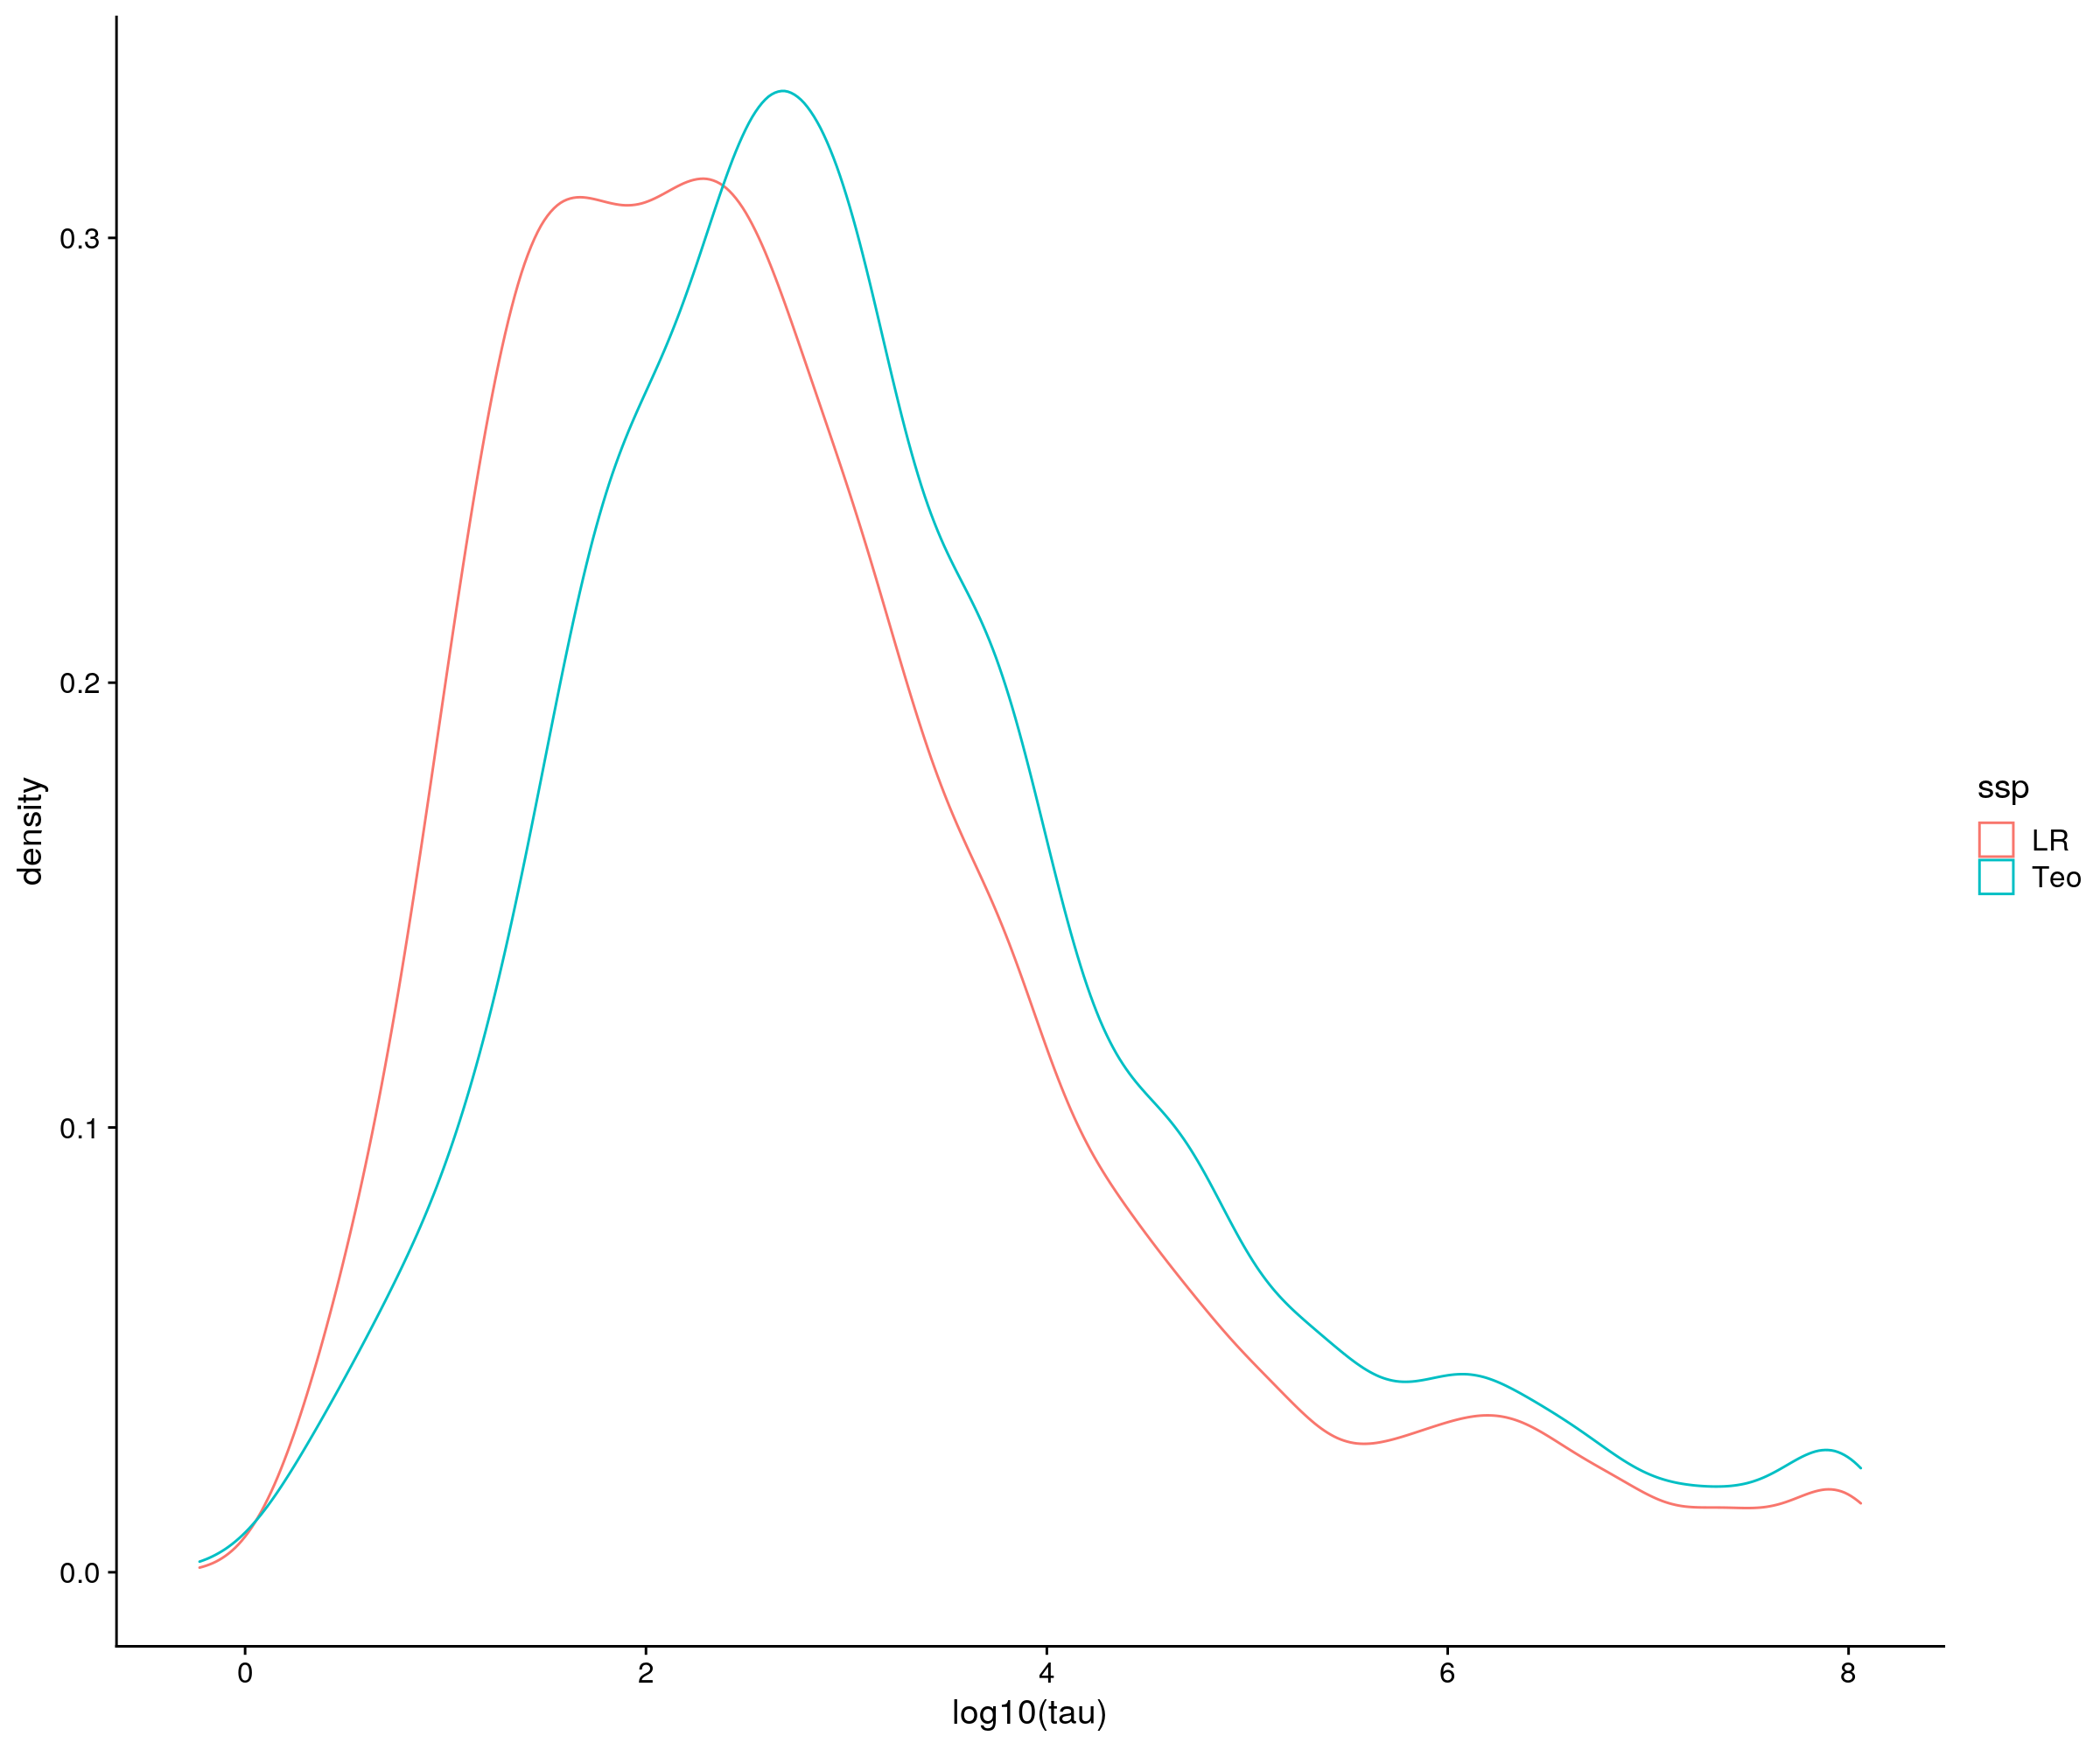

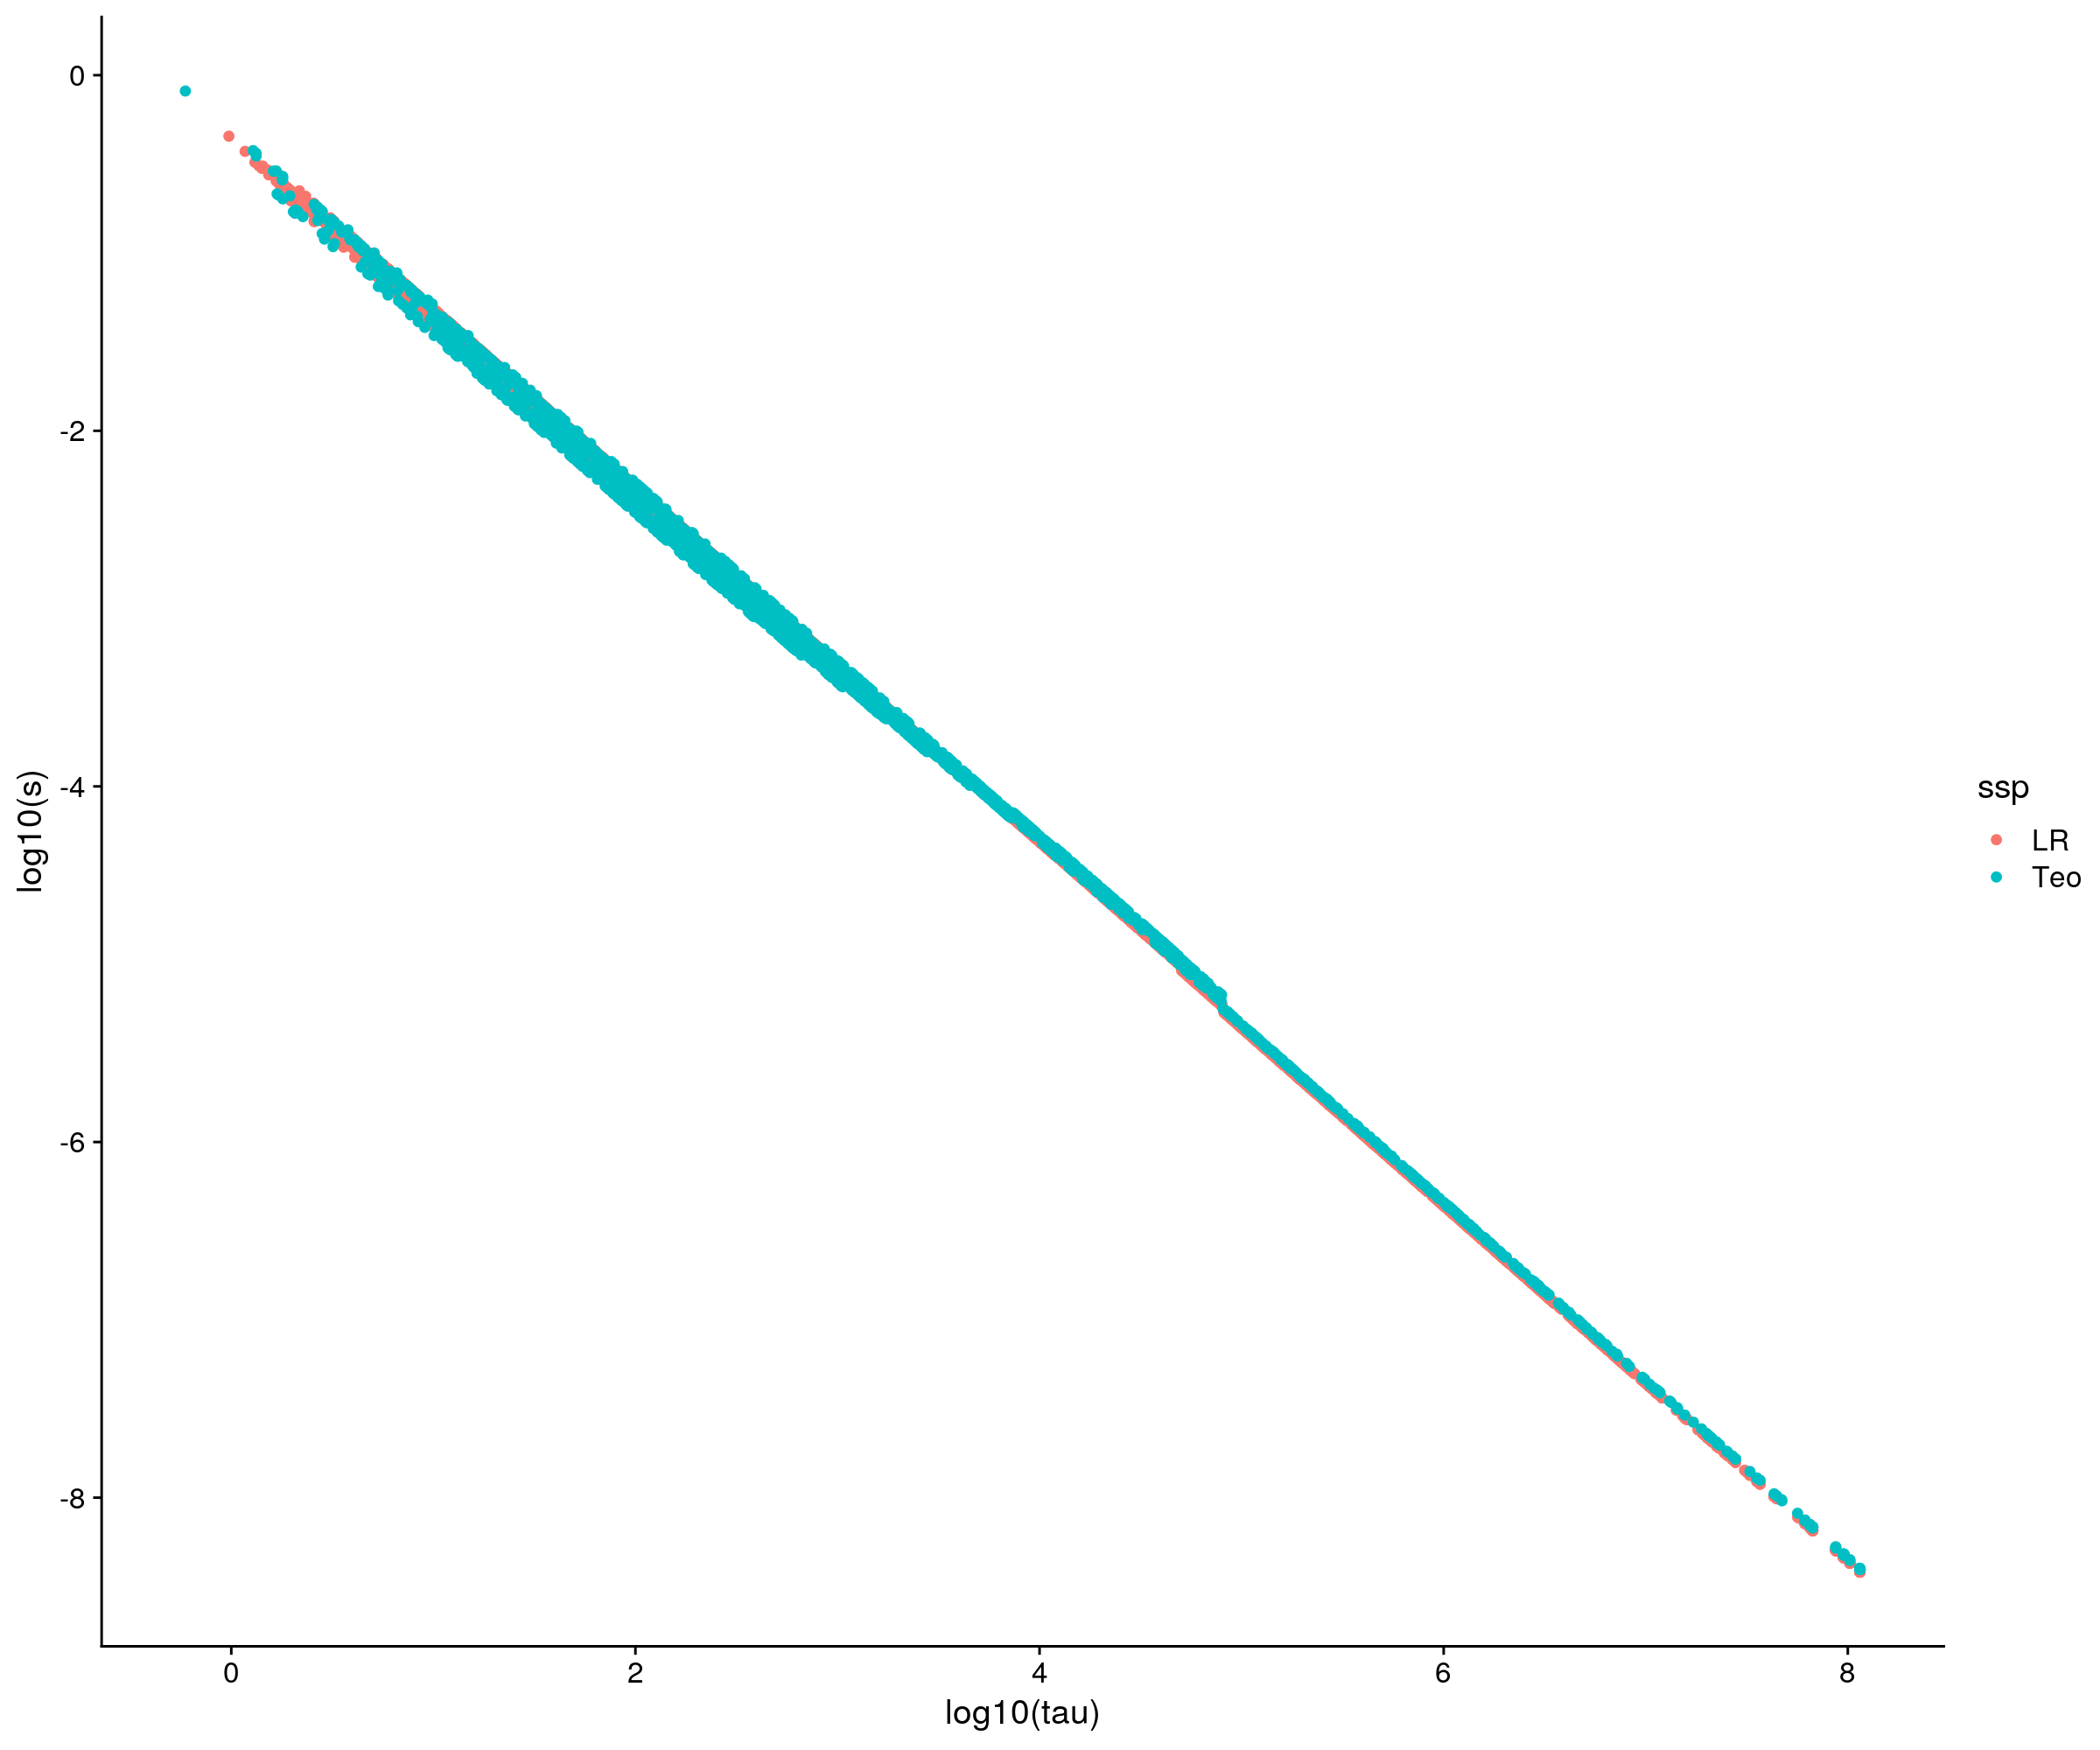

In [8]:
options(repr.plot.width = 12, repr.plot.height = 10, repr.plot.res = 200)


plot_sweeps_df <- all_sweeps_df %>% mutate(s = s) %>% filter(!ssp_pop %in% c("Teo--Palmar_Chico","LR--Palmar_Chico"))


plot_sweeps_df %>% 
    group_by(ssp_pop) %>% 
    arrange(desc(tau)) %>% 
    ungroup() %>% 
    ggplot(aes(ssp_pop, log10(tau), size = log10(s), bg = ssp)) +
    #geom_jitter(alpha = 0.2, height = 0,  width = 0)
    ggforce::geom_sina(alpha = 0.2, shape = 21) +
    geom_hline(yintercept = 4.0) +
    coord_flip() 



plot_sweeps_df %>% 
    ggplot(aes(log10(s), colour = ssp)) +
    geom_density()


plot_sweeps_df %>% 
    ggplot(aes(log10(tau), colour = ssp)) +
    geom_density()


plot_sweeps_df %>% 
    ggplot(aes(log10(tau), log10(s), colour = ssp)) +
    geom_point()


In [77]:

sweep_i <- all_sweeps_df[1,]
sweep_i$ssp_pop; sweep_i$start; sweep_i$end


head(pi_df)
pi_sweep <- filter(pi_df, ssp_pop == sweep_i$ssp_pop, chr == sweep_i$chrom, start >= sweep_i$start, end <= sweep_i$end)

pi_sweep
#plot(pi_sweep$end, pi_sweep$pi)

[1] "LR--Amatlan_de_Canas"

[1] 6934683

[1] 6936984

WinStart WinStop chr  WinCenter tW        tP        tF       tH      
1 100000   200000  chr3 150000     87.41677  60.60983 148.7106 25.90988
2 100000   200000  chr3 150000     87.41677  60.60983 148.7106 25.90988
3 200000   300000  chr3 250000     81.06601  65.63722 124.1083 26.98269
4 200000   300000  chr3 250000     81.06601  65.63722 124.1083 26.98269
5 300000   400000  chr3 350000    149.03801 112.62050 242.4822 52.22603
6 300000   400000  chr3 350000    149.03801 112.62050 242.4822 52.22603
  tL       Tajima    ⋯ nSites start end   size  pi          ref subspecies
1 43.25985 -1.278275 ⋯ 14697  1e+05 2e+05 1e+05 0.004123959 v5  LR        
2 43.25985 -1.278275 ⋯ 14697  1e+05 2e+05 1e+05 0.004123959 v5  LR        
3 46.30996 -0.792914 ⋯ 17414  2e+05 3e+05 1e+05 0.003769221 v5  LR        
4 46.30996 -0.792914 ⋯ 17414  2e+05 3e+05 1e+05 0.003769221 v5  LR        
5 82.42326 -1.021522 ⋯ 27656  3e+05 4e+05 1e+05 0.004072191 v5  LR        
6 82.42326 -1.021522 ⋯ 27656  3e+05 4e+05 1e+05 0.004072191 v5  LR        
  pop              ssp_pop              color         
1 Amatlan de Canas LR--Amatlan_de_Canas cornflowerblue
2 Amatlan de Canas LR--Amatlan_de_Canas cornflowerblue
3 Amatlan de Canas LR--Amatlan_de_Canas cornflowerblue
4 Amatlan de Canas LR--Amatlan_de_Canas cornflowerblue
5 Amatlan de Canas LR--Amatlan_de_Canas cornflowerblue
6 Amatlan de Canas LR--Amatlan_de_Canas cornflowerblue

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


WinStart WinStop chr WinCenter tW tP tF tH tL Tajima ⋯ nSites start end
     size pi ref subspecies pop ssp_pop color